<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Junwei He
- Nombre de alumno 2: Sofía Chávez

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/sofiachavezb/LabProgramacionMDS)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [27]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [28]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [29]:
#Codigo Aqui

df_homero = pd.read_csv('/content/energia_homero.csv')

df_homero['date'] = pd.to_datetime(df_homero['date'])

fig = px.line(df_homero, x='date', y='Energy_kWh', title='Consumo de Energía de Homero')
fig.show()

In [30]:
df_homero.head()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [31]:
# 0
df_train = df_homero[df_homero['date'] <= '2020-02-29']
df_test = df_homero[df_homero['date'] >= '2020-03-01']

In [32]:
#1
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Pipeline_trend = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('linear', LinearRegression())
])

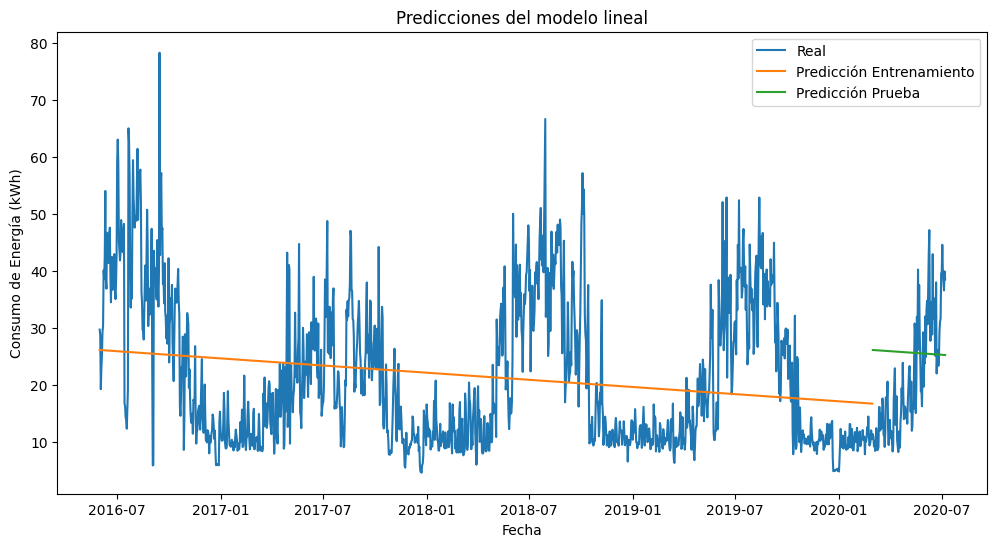

In [33]:

# 2
X_train = np.array(range(len(df_train))).reshape(-1, 1)
y_train = df_train['Energy_kWh']
X_test = np.array(range(len(df_test))).reshape(-1, 1)
y_test = df_test['Energy_kWh']

Pipeline_trend.fit(X_train, y_train)

y_pred_train = Pipeline_trend.predict(X_train)
y_pred_test = Pipeline_trend.predict(X_test)


# Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df_homero['date'], df_homero['Energy_kWh'], label='Real')
plt.plot(df_train['date'], y_pred_train, label='Predicción Entrenamiento')
plt.plot(df_test['date'], y_pred_test, label='Predicción Prueba')
plt.xlabel('Fecha')
plt.ylabel('Consumo de Energía (kWh)')
plt.title('Predicciones del modelo lineal')
plt.legend()
plt.show()



In [34]:
# Calcular MAE para el conjunto de entrenamiento
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"MAE en el conjunto de entrenamiento: {mae_train}")

# Calcular MAE para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"MAE en el conjunto de prueba: {mae_test}")

MAE en el conjunto de entrenamiento: 10.568154088025606
MAE en el conjunto de prueba: 9.927510004809236


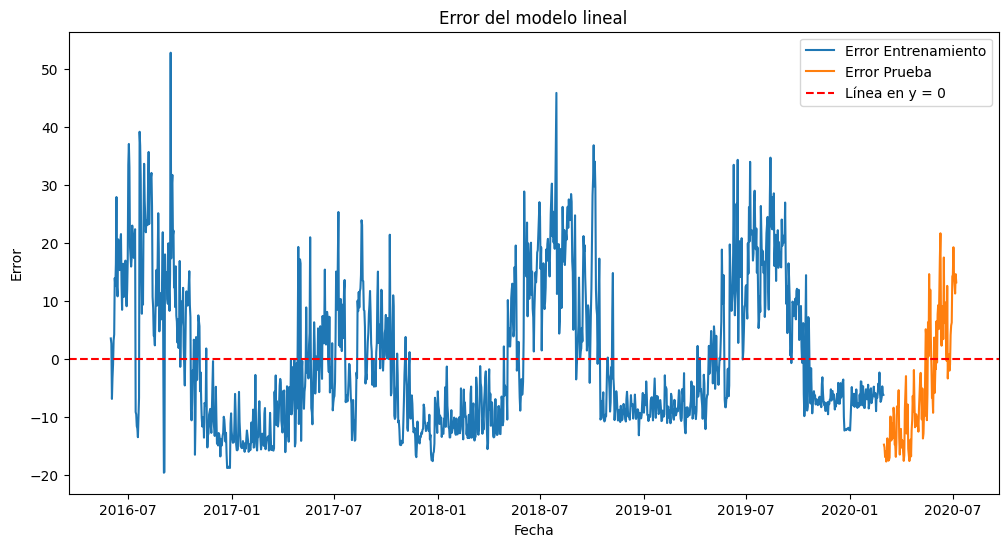

In [35]:

# 3. Graficar el error
error_train = y_train - y_pred_train
error_test = y_test - y_pred_test

plt.figure(figsize=(12, 6))
plt.plot(df_train['date'], error_train, label='Error Entrenamiento')
plt.plot(df_test['date'], error_test, label='Error Prueba')
plt.axhline(0, color='red', linestyle='--', label='Línea en y = 0')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.title('Error del modelo lineal')
plt.legend()
plt.show()

Si existe una estacionalidad en el error. Los meses con mayor consumo de energía son entre mayo y septiembre aproximadamente que calza con el invierno chileno, por otro lado  los meses con menor consumo de energía están entre noviembre y abril (Verano Chileno).

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 2, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier


In [37]:
df_homero['date'] = pd.to_datetime(df_homero['date'])

# Dividir el conjunto de datos
df_train = df_homero[df_homero['date'] <= '2020-02-29']
df_test = df_homero[df_homero['date'] >= '2020-03-01']

X_train = df_train[['date']].copy()
y_train = df_train['Energy_kWh'].copy()

X_test = df_test[['date']].copy()
y_test = df_test['Energy_kWh'].copy()


In [38]:
transformer = TimeTransformer(n = 2, p = 365)
transformer.fit_transform(X_train) # notar que sólo usa la variable "date"

,trend,fourier_0,fourier_1,fourier_2,fourier_3
0,0,0.000000,1.000000,0.000000,1.000000
1,1,0.017213,0.999852,0.034422,0.999407
2,2,0.034422,0.999407,0.068802,0.997630
3,3,0.051620,0.998667,0.103102,0.994671
4,4,0.068802,0.997630,0.137279,0.990532
...,...,...,...,...,...
1364,1364,-0.996659,-0.081676,0.162807,-0.986658
1365,1365,-0.997917,-0.064508,0.128748,-0.991677
1366,1366,-0.998880,-0.047321,0.094537,-0.995521
1367,1367,-0.999546,-0.030120,0.060213,-0.998186


In [39]:
#5 y 6
pipeline = Pipeline([
    ('time_transformer', TimeTransformer(n=4, p=365)),
    ('linear_regression', LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

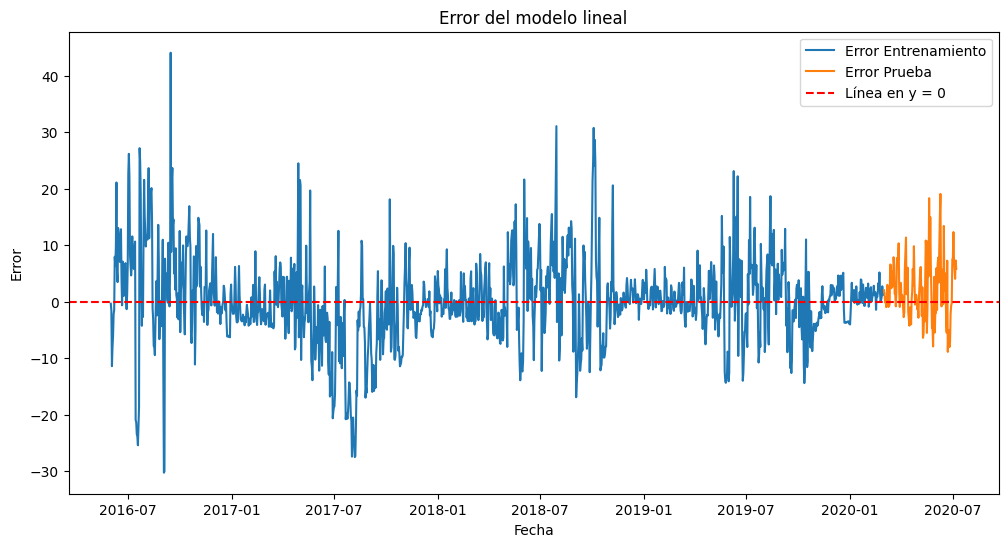

In [40]:
# 6. Graficar el error
error_trainfourier = y_train - train_pred
error_testfourier = y_test - test_pred

plt.figure(figsize=(12, 6))
plt.plot(df_train['date'], error_trainfourier, label='Error Entrenamiento')
plt.plot(df_test['date'], error_testfourier, label='Error Prueba')
plt.axhline(0, color='red', linestyle='--', label='Línea en y = 0')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.title('Error del modelo lineal')
plt.legend()
plt.show()

In [41]:
# Calcular MAE para el conjunto de entrenamiento
mae_trainfourier = mean_absolute_error(y_train, train_pred)
print(f"MAE en el conjunto de entrenamiento: {mae_train}")

# Calcular MAE para el conjunto de prueba
mae_testfourier = mean_absolute_error(y_test, test_pred)
print(f"MAE en el conjunto de prueba: {mae_test}")

MAE en el conjunto de entrenamiento: 10.568154088025606
MAE en el conjunto de prueba: 9.927510004809236


In [42]:


from sklearn.metrics import mean_absolute_error

# Crear un DataFrame para almacenar los MAEs
mae_df = pd.DataFrame(columns=['Modelo', 'MAE_Entrenamiento', 'MAE_Prueba'])

# Agregar los MAEs del modelo lineal
mae_df = pd.concat([mae_df, pd.DataFrame({'Modelo': ['Modelo Lineal'],
                                          'MAE_Entrenamiento': [mae_train],
                                          'MAE_Prueba': [mae_test]})], ignore_index=True)


# Agregar los MAEs del modelo con términos de Fourier
mae_df = pd.concat([mae_df, pd.DataFrame({'Modelo': ['Modelo Fourier'],
                                          'MAE_Entrenamiento': [mae_trainfourier],
                                          'MAE_Prueba': [mae_testfourier]})], ignore_index=True)

print(mae_df)

           Modelo  MAE_Entrenamiento  MAE_Prueba
0   Modelo Lineal          10.568154    9.927510
1  Modelo Fourier           5.345589    4.457478


<ipython-input-42-7246ae1f1463>:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



El modelo fourier consigue mejores resultados tanto en el conjunto de entrenamiento como en el de prueba. El error es menor en el de prueba lo que indica que generaliza mejor a los datos no vistos.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [43]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [44]:
#CODIGO AQUI

df_trainprophet = df_train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
df_testprophet = df_test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

In [45]:
model = Prophet()
model.fit(df_trainprophet)

future = model.make_future_dataframe(periods=len(df_testprophet))
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa50lxao9/k5nh3ouk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa50lxao9/_bwb80wx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65420', 'data', 'file=/tmp/tmpa50lxao9/k5nh3ouk.json', 'init=/tmp/tmpa50lxao9/_bwb80wx.json', 'output', 'file=/tmp/tmpa50lxao9/prophet_modelq174anfi/prophet_model-20241021024557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:45:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:45:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


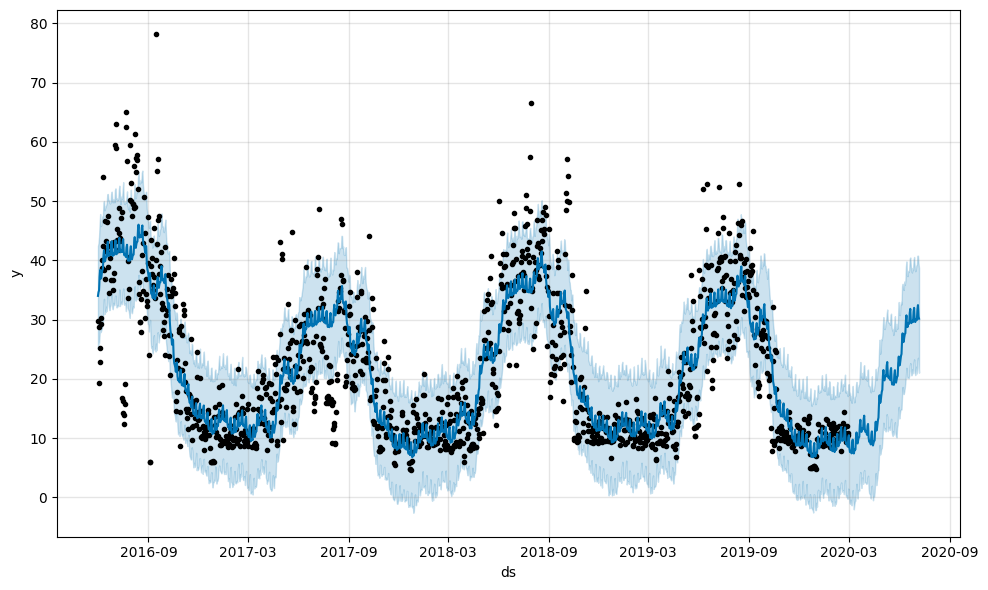

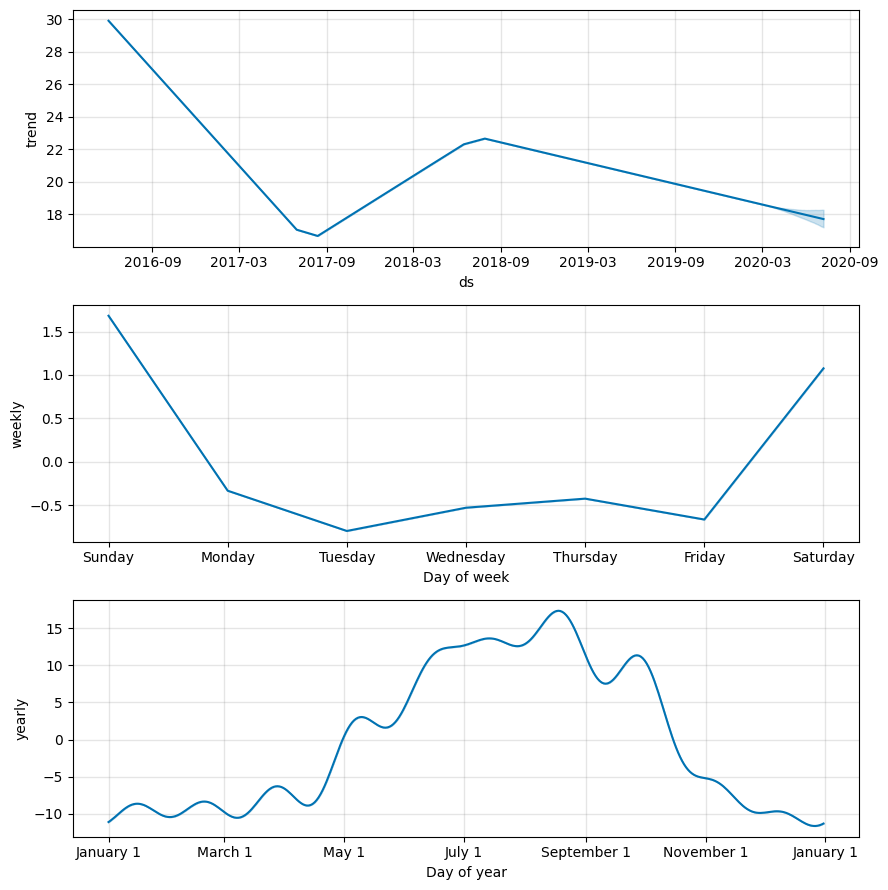

In [46]:
# 3. Grafique las predicciones y las componentes del modelo Prophet.
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [47]:

# 4. Calcule el MAE de la predicción en el conjunto de entrenamiento y de prueba.
y_pred_train_prophet = forecast[forecast['ds'].isin(df_trainprophet['ds'])]['yhat']
y_pred_test_prophet = forecast[forecast['ds'].isin(df_testprophet['ds'])]['yhat']

mae_train_prophet = mean_absolute_error(df_trainprophet['y'], y_pred_train_prophet)
mae_test_prophet = mean_absolute_error(df_testprophet['y'], y_pred_test_prophet)

print(f"MAE en el conjunto de entrenamiento (Prophet): {mae_train_prophet}")
print(f"MAE en el conjunto de prueba (Prophet): {mae_test_prophet}")


MAE en el conjunto de entrenamiento (Prophet): 4.817481017717443
MAE en el conjunto de prueba (Prophet): 4.921079315201517


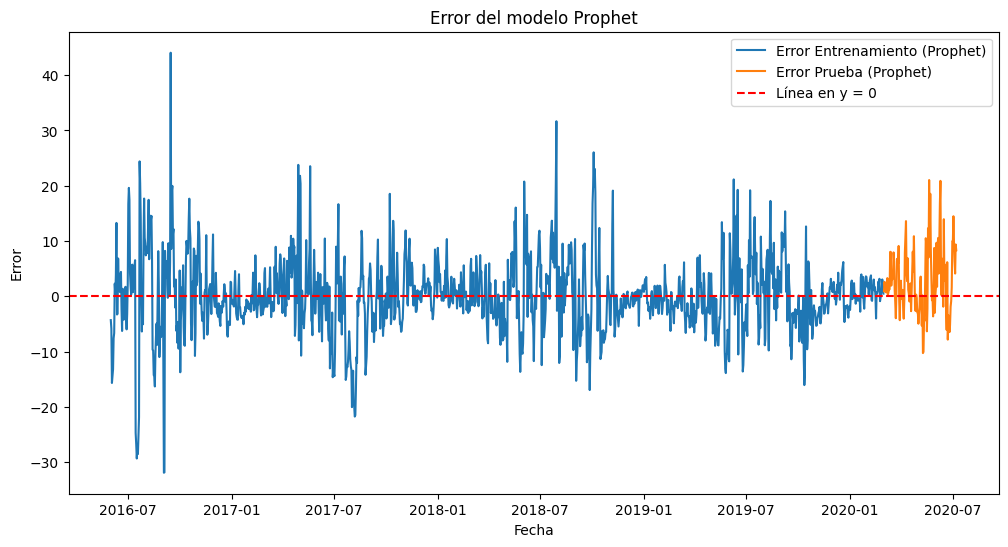

           Modelo  MAE_Entrenamiento  MAE_Prueba
0   Modelo Lineal          10.568154    9.927510
1  Modelo Fourier           5.345589    4.457478
2  Modelo Prophet           4.817481    4.921079


In [48]:
#5
error_train_prophet = df_trainprophet['y'] - y_pred_train_prophet
error_test_prophet = df_testprophet['y'] - y_pred_test_prophet

plt.figure(figsize=(12, 6))
plt.plot(df_trainprophet['ds'], error_train_prophet, label='Error Entrenamiento (Prophet)')
plt.plot(df_testprophet['ds'], error_test_prophet, label='Error Prueba (Prophet)')
plt.axhline(0, color='red', linestyle='--', label='Línea en y = 0')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.title('Error del modelo Prophet')
plt.legend()
plt.show()

# Agregar los MAEs del modelo Prophet
mae_df = pd.concat([mae_df, pd.DataFrame({'Modelo': ['Modelo Prophet'],
                                          'MAE_Entrenamiento': [mae_train_prophet],
                                          'MAE_Prueba': [mae_test_prophet]})], ignore_index=True)

print(mae_df)

Se observa un leve comportamiento estacional análogo al original pero con menor amplitud.

El modelo tiene un rendimineto similar al modelo de Fourier pues se ajusta mejor a la data pero a la hora del test rinde un poco peor en los MAE´s.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa50lxao9/daet0fy5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa50lxao9/pqcqu4d4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7837', 'data', 'file=/tmp/tmpa50lxao9/daet0fy5.json', 'init=/tmp/tmpa50lxao9/pqcqu4d4.json', 'output', 'file=/tmp/tmpa50lxao9/prophet_modelkl3djvat/prophet_model-20241021024600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:46:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:46:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE en el conjunto de entrenamiento (Prophet con regresores): 4.717650445954827
MAE en el conjunto de prueba (Prophet con regresores): 4.517825187321753


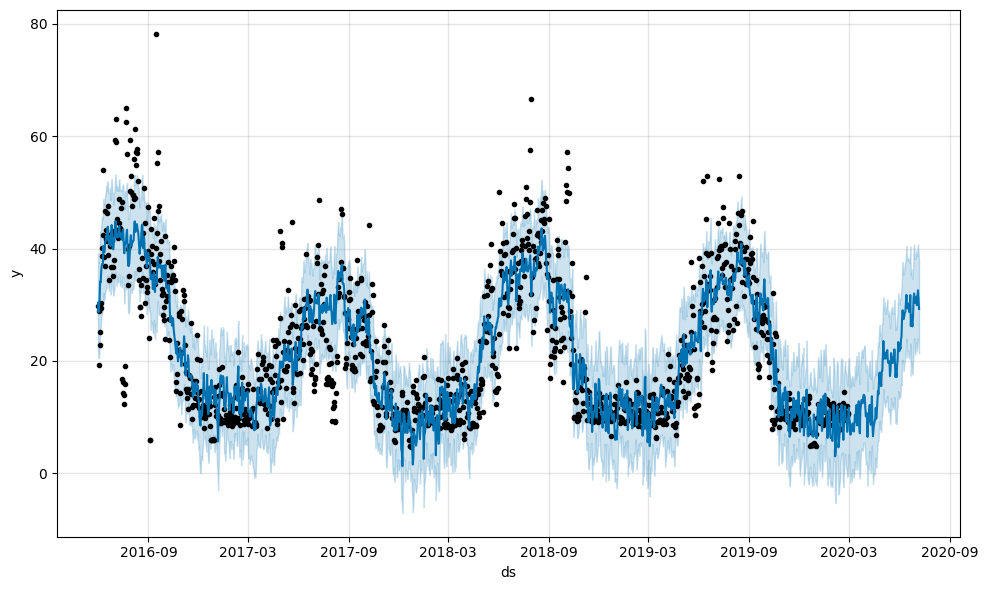

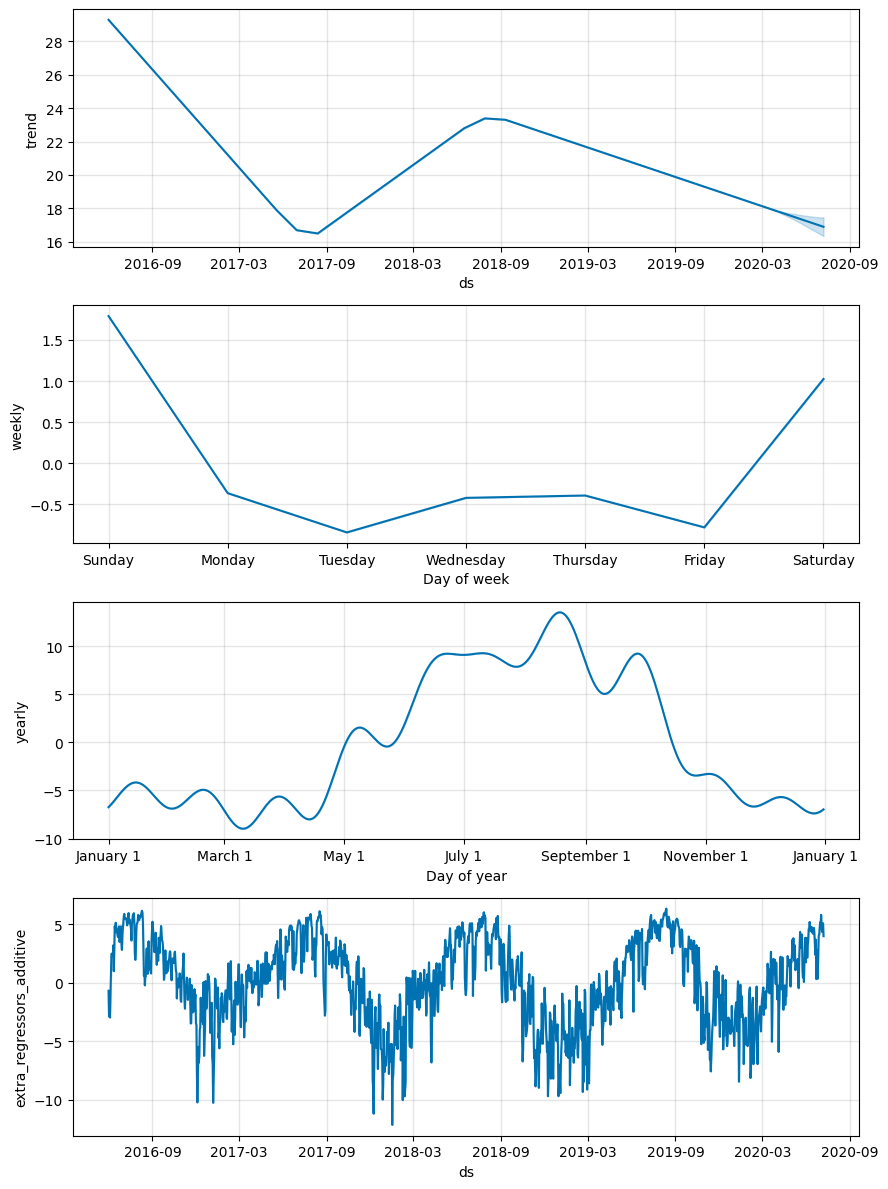

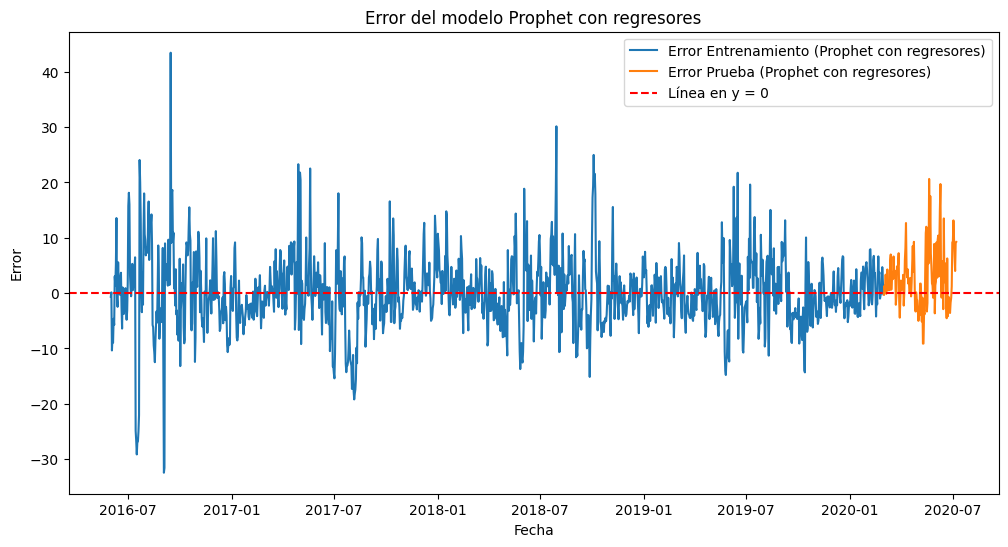

                          Modelo  MAE_Entrenamiento  MAE_Prueba
0                  Modelo Lineal          10.568154    9.927510
1                 Modelo Fourier           5.345589    4.457478
2                 Modelo Prophet           4.817481    4.921079
3  Modelo Prophet con Regresores           4.717650    4.517825


In [49]:
#CODIGO AQUI


# 0. Seleccionar las variables exógenas y unir con los datos de entrenamiento y prueba
df_frink = pd.read_csv('datos_frink.csv')
df_frink['date'] = pd.to_datetime(df_frink['date'])
df_frink = df_frink.rename(columns={'date': 'ds'})

df_train_prophet_reg = pd.merge(df_trainprophet, df_frink, on='ds', how='left')
df_test_prophet_reg = pd.merge(df_testprophet, df_frink, on='ds', how='left')


# 1. Crear el modelo Prophet e incluir los regresores
model_reg = Prophet()

for regressor in ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg','Dew_avg']:
    model_reg.add_regressor(regressor)


model_reg.fit(df_train_prophet_reg)

# Preparar el dataset de predicciones con el conjunto de prueba
future_reg = model_reg.make_future_dataframe(periods=len(df_test_prophet_reg))
future_reg = pd.merge(future_reg, df_frink, on='ds', how='left') # Asegurarse que los regresores esten presentes en 'future'

# Realizar las predicciones
forecast_reg = model_reg.predict(future_reg)

# 2
fig1_reg = model_reg.plot(forecast_reg)
fig2_reg = model_reg.plot_components(forecast_reg)


# 3
y_pred_train_prophet_reg = forecast_reg[forecast_reg['ds'].isin(df_train_prophet_reg['ds'])]['yhat']
y_pred_test_prophet_reg = forecast_reg[forecast_reg['ds'].isin(df_test_prophet_reg['ds'])]['yhat']

mae_train_prophet_reg = mean_absolute_error(df_train_prophet_reg['y'], y_pred_train_prophet_reg)
mae_test_prophet_reg = mean_absolute_error(df_test_prophet_reg['y'], y_pred_test_prophet_reg)

print(f"MAE en el conjunto de entrenamiento (Prophet con regresores): {mae_train_prophet_reg}")
print(f"MAE en el conjunto de prueba (Prophet con regresores): {mae_test_prophet_reg}")

# 4

error_train_prophet_reg = df_train_prophet_reg['y'] - y_pred_train_prophet_reg


df_test_prophet_reg_y_no_index = df_test_prophet_reg['y'].reset_index(drop=True)
y_pred_test_prophet_reg_no_index = y_pred_test_prophet_reg.reset_index(drop=True)
error_test_prophet_reg = df_test_prophet_reg_y_no_index - y_pred_test_prophet_reg_no_index

error_test_prophet_reg_no_index = error_test_prophet_reg.reset_index(drop=True)





plt.figure(figsize=(12, 6))
plt.plot(df_train_prophet_reg['ds'], error_train_prophet_reg, label='Error Entrenamiento (Prophet con regresores)')
plt.plot(df_test_prophet_reg['ds'], error_test_prophet_reg, label='Error Prueba (Prophet con regresores)')
plt.axhline(0, color='red', linestyle='--', label='Línea en y = 0')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.title('Error del modelo Prophet con regresores')
plt.legend()
plt.show()


# Agregar los MAEs del modelo Prophet con regresores
mae_df = pd.concat([mae_df, pd.DataFrame({'Modelo': ['Modelo Prophet con Regresores'],
                                          'MAE_Entrenamiento': [mae_train_prophet_reg],
                                          'MAE_Prueba': [mae_test_prophet_reg]})], ignore_index=True)

print(mae_df)

**Respuesta**: Ahora no se puede ver un comportamiento estacionl. Estas variables influyen levemente en el comportamiento ya que al incluirlos al modelo, mejoró en 0.4 en MAE de prueba respecto al modelo sin regresores y en 0.1 en Mae entremaiento.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

<Figure size 1000x500 with 0 Axes>

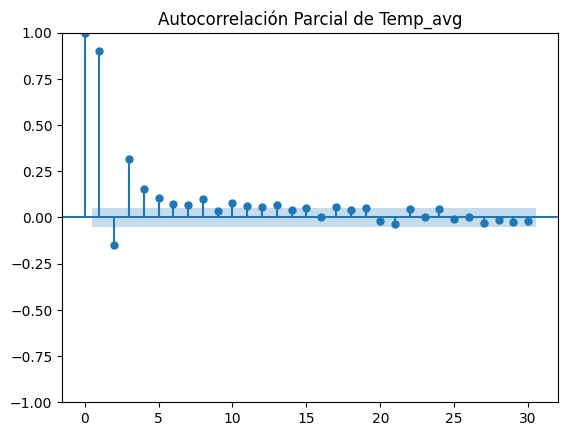

<Figure size 1000x500 with 0 Axes>

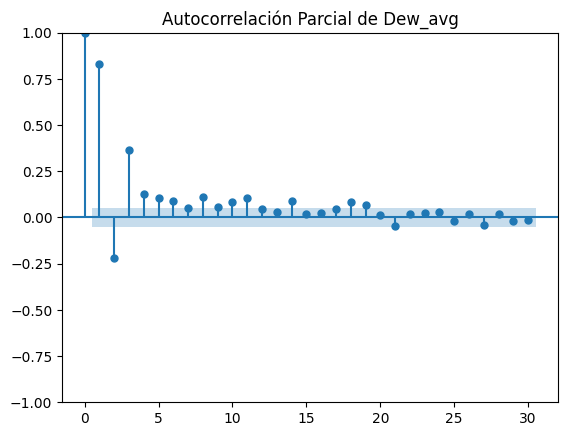

<Figure size 1000x500 with 0 Axes>

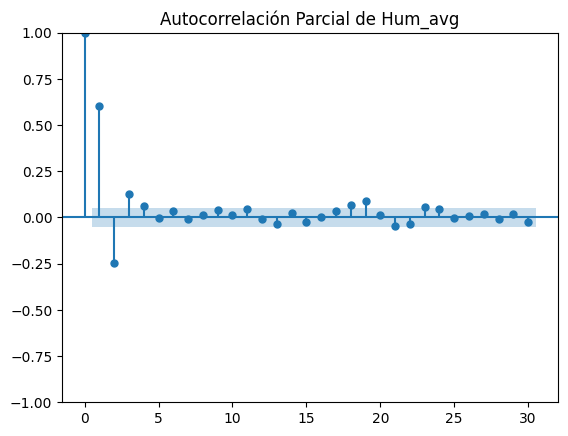

<Figure size 1000x500 with 0 Axes>

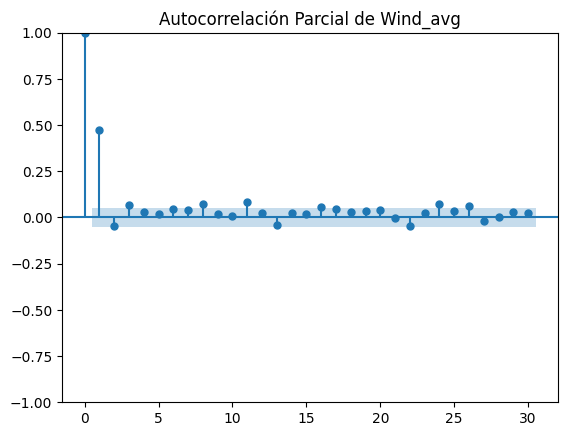

<Figure size 1000x500 with 0 Axes>

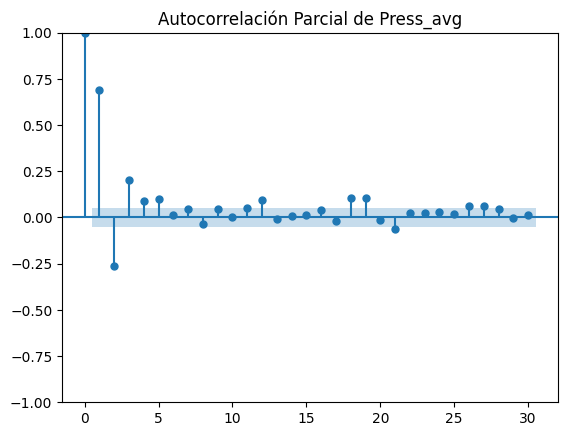

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa50lxao9/6u44ekf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa50lxao9/egbxmql4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26294', 'data', 'file=/tmp/tmpa50lxao9/6u44ekf4.json', 'init=/tmp/tmpa50lxao9/egbxmql4.json', 'output', 'file=/tmp/tmpa50lxao9/prophet_modelxxtgli67/prophet_model-20241021024604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:46:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:46:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


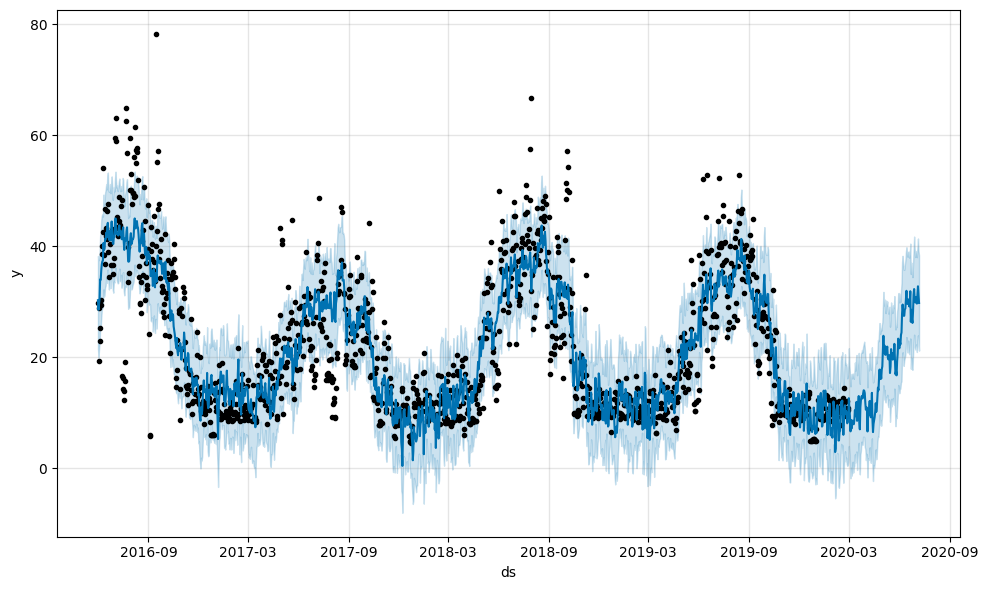

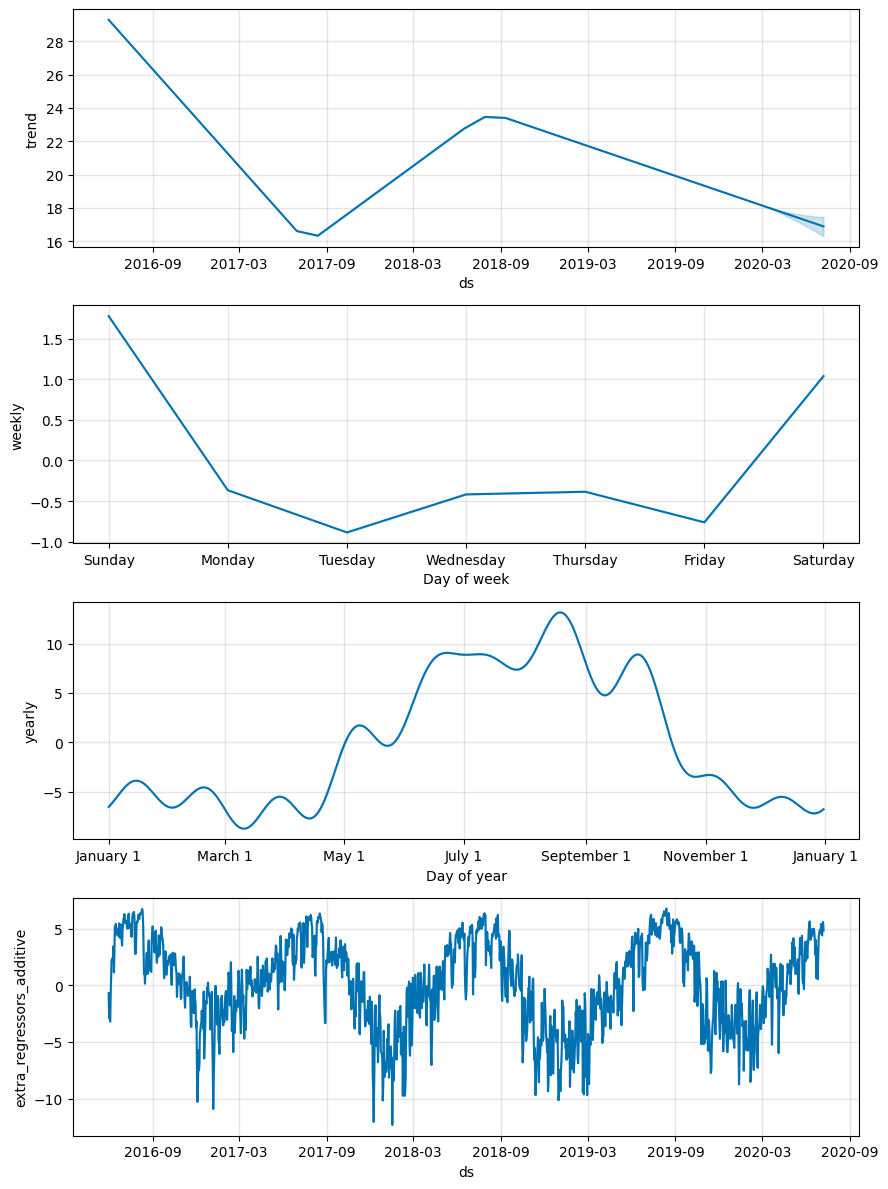

In [50]:
#CODIGO AQUI
from statsmodels.graphics.tsaplots import plot_pacf

# 1. Calcular la Autocorrelación Parcial y determinar los lags
for variable in ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']:
  plt.figure(figsize=(10, 5))
  plot_pacf(df_train_prophet_reg[variable].dropna(), lags=30)
  plt.title(f'Autocorrelación Parcial de {variable}')
  plt.show()

# Definimos los lags basándonos en la gráfica de autocorrelación
lags_variables = {'Temp_avg': 7, 'Dew_avg': 7, 'Hum_avg': 5, 'Wind_avg': 3, 'Press_avg': 7}
#Donde los puntos empiezan a acercarse a 0

# 2. Aplicar los lags e incluirlos en los conjuntos train y test
for variable, lag in lags_variables.items():
  df_train_prophet_reg[f'{variable}_lag{lag}'] = df_train_prophet_reg[variable].shift(lag)
  df_test_prophet_reg[f'{variable}_lag{lag}'] = df_test_prophet_reg[variable].shift(lag)


# 3. Imputar los valores nulos con la media
for variable, lag in lags_variables.items():
  df_train_prophet_reg[f'{variable}_lag{lag}'] = df_train_prophet_reg[f'{variable}_lag{lag}'].fillna(df_train_prophet_reg[variable].mean())
  df_test_prophet_reg[f'{variable}_lag{lag}'] = df_test_prophet_reg[f'{variable}_lag{lag}'].fillna(df_test_prophet_reg[variable].mean())


# 4. Crear y entrenar el modelo Prophet con lags
model_reg_lag = Prophet()
for regressor in ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg', 'Dew_avg']:
  model_reg_lag.add_regressor(regressor)
for variable, lag in lags_variables.items():
  model_reg_lag.add_regressor(f'{variable}_lag{lag}')


model_reg_lag.fit(df_train_prophet_reg)


# Preparar el dataset de predicciones con el conjunto de prueba
future_reg_lag = model_reg_lag.make_future_dataframe(periods=len(df_test_prophet_reg))
future_reg_lag = pd.merge(future_reg_lag, df_frink, on='ds', how='left')
for variable, lag in lags_variables.items():
    future_reg_lag[f'{variable}_lag{lag}'] = future_reg_lag[variable].shift(lag)
    future_reg_lag[f'{variable}_lag{lag}'] = future_reg_lag[f'{variable}_lag{lag}'].fillna(future_reg_lag[variable].mean())

# Realizar las predicciones
forecast_reg_lag = model_reg_lag.predict(future_reg_lag)

# 5. Graficar las predicciones y las componentes del modelo Prophet
fig1_reg_lag = model_reg_lag.plot(forecast_reg_lag)
fig2_reg_lag = model_reg_lag.plot_components(forecast_reg_lag)

In [51]:
# 6. Calcular el MAE
y_pred_train_prophet_reg_lag = forecast_reg_lag[forecast_reg_lag['ds'].isin(df_train_prophet_reg['ds'])]['yhat']
y_pred_test_prophet_reg_lag = forecast_reg_lag[forecast_reg_lag['ds'].isin(df_test_prophet_reg['ds'])]['yhat']


mae_train_prophet_reg_lag = mean_absolute_error(df_train_prophet_reg['y'], y_pred_train_prophet_reg_lag)
mae_test_prophet_reg_lag = mean_absolute_error(df_test_prophet_reg['y'], y_pred_test_prophet_reg_lag)

print(f"MAE en el conjunto de entrenamiento (Prophet con regresores y lags): {mae_train_prophet_reg_lag}")
print(f"MAE en el conjunto de prueba (Prophet con regresores y lags): {mae_test_prophet_reg_lag}")



# Agregar los MAEs del modelo Prophet con regresores y lags
mae_df = pd.concat([mae_df, pd.DataFrame({'Modelo': ['Modelo Prophet con Regresores y Lags'],
                                          'MAE_Entrenamiento': [mae_train_prophet_reg_lag],
                                          'MAE_Prueba': [mae_test_prophet_reg_lag]})], ignore_index=True)

print(mae_df)

MAE en el conjunto de entrenamiento (Prophet con regresores y lags): 4.699711506469686
MAE en el conjunto de prueba (Prophet con regresores y lags): 4.4972277190933365
                                 Modelo  MAE_Entrenamiento  MAE_Prueba
0                         Modelo Lineal          10.568154    9.927510
1                        Modelo Fourier           5.345589    4.457478
2                        Modelo Prophet           4.817481    4.921079
3         Modelo Prophet con Regresores           4.717650    4.517825
4  Modelo Prophet con Regresores y Lags           4.699712    4.497228


El modelo con lags es mejor que el modelo normal y el con regresores. Tiene menor MAE en test y train.

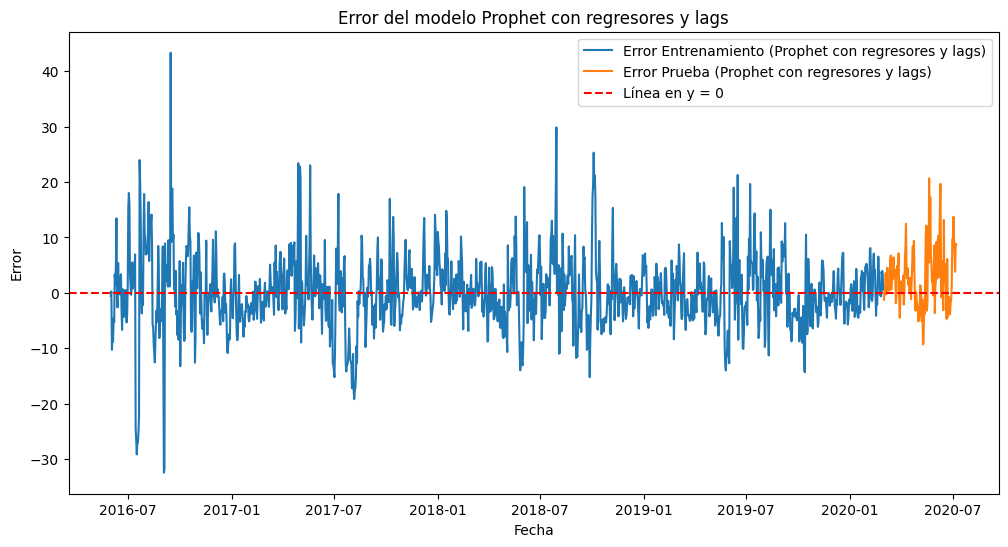

In [52]:
# 7. Graficar el error

error_train_prophet_reg_lag = df_train_prophet_reg['y'] - y_pred_train_prophet_reg_lag
error_test_prophet_reg_lag = df_test_prophet_reg['y'] - y_pred_test_prophet_reg_lag



error_test_prophet_reg_lag_no_index = error_test_prophet_reg_lag.reset_index(drop=True)
y_pred_test_prophet_reg_lag_no_index = y_pred_test_prophet_reg_lag.reset_index(drop=True)
df_test_prophet_reg_y_no_index = df_test_prophet_reg['y'].reset_index(drop=True)

error_test_prophet_reg_lag = df_test_prophet_reg_y_no_index - y_pred_test_prophet_reg_lag_no_index

plt.figure(figsize=(12, 6))
plt.plot(df_train_prophet_reg['ds'], error_train_prophet_reg_lag, label='Error Entrenamiento (Prophet con regresores y lags)')
plt.plot(df_test_prophet_reg['ds'], error_test_prophet_reg_lag, label='Error Prueba (Prophet con regresores y lags)')
plt.axhline(0, color='red', linestyle='--', label='Línea en y = 0')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.title('Error del modelo Prophet con regresores y lags')
plt.legend()
plt.show()


No se puede observar una estacionalidad. El modelo con los lags es notablemente mejor.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [53]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

Tuning Prophet parameters: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]


Mejores parámetros: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


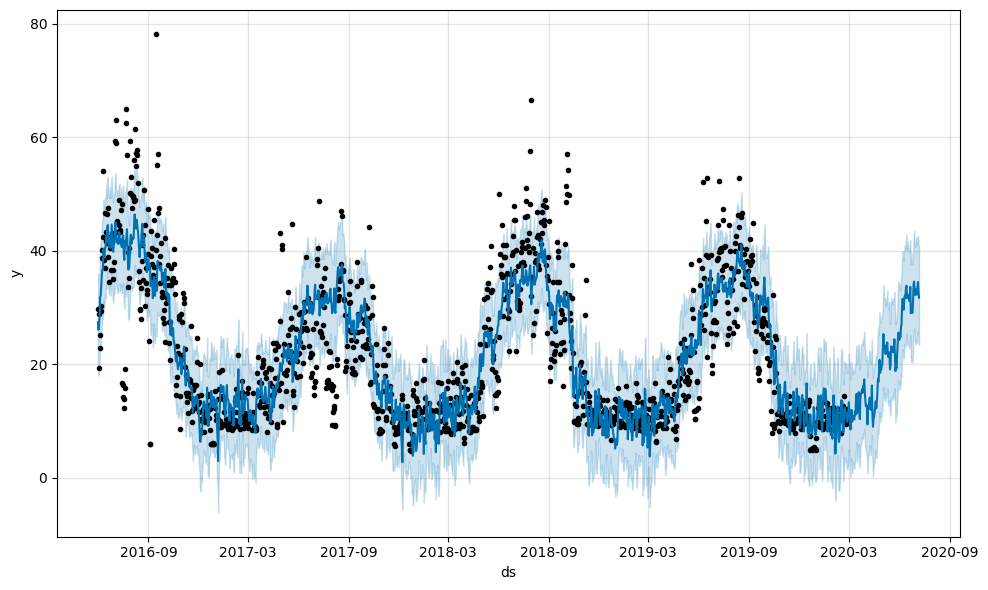

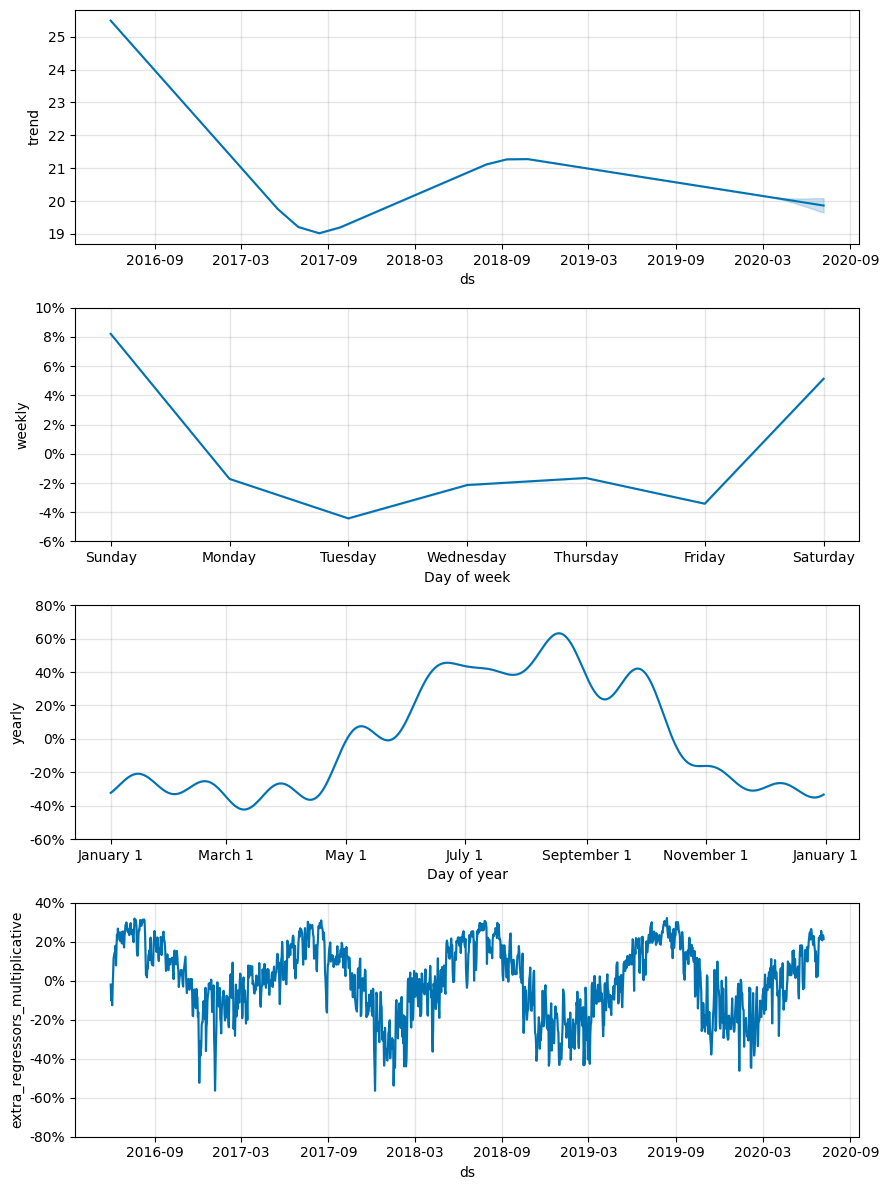

In [54]:
#CODIGO AQUI
# 1. Crear una grilla y optimizar los hiperparámetros
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}

features = ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg', 'Dew_avg',
            'Temp_avg_lag7', 'Dew_avg_lag7', 'Hum_avg_lag5', 'Wind_avg_lag3', 'Press_avg_lag7']


tuning_results, best_params = optimize_prophet(df_train_prophet_reg, df_test_prophet_reg, features, param_grid)

print("Mejores parámetros:", best_params)

# 2. Crear y entrenar un modelo Prophet con los mejores parámetros
model_optimized = Prophet(**best_params)
for feature in features:
    model_optimized.add_regressor(feature)
model_optimized.fit(df_train_prophet_reg)

# 3. Hacer predicciones y graficar
future_optimized = model_optimized.make_future_dataframe(periods=len(df_test_prophet_reg))
df_feat = pd.concat([df_train_prophet_reg[features], df_test_prophet_reg[features]]).reset_index(drop=True)
future_optimized[features] = df_feat[features]

forecast_optimized = model_optimized.predict(future_optimized)

fig1_optimized = model_optimized.plot(forecast_optimized)
fig2_optimized = model_optimized.plot_components(forecast_optimized)

In [55]:
# 4. Calcular el MAE
y_pred_train_optimized = forecast_optimized[forecast_optimized['ds'].isin(df_train_prophet_reg['ds'])]['yhat']
y_pred_test_optimized = forecast_optimized[forecast_optimized['ds'].isin(df_test_prophet_reg['ds'])]['yhat']

mae_train_optimized = mean_absolute_error(df_train_prophet_reg['y'], y_pred_train_optimized)
mae_test_optimized = mean_absolute_error(df_test_prophet_reg['y'], y_pred_test_optimized)

print(f"MAE en el conjunto de entrenamiento (Prophet optimizado): {mae_train_optimized}")
print(f"MAE en el conjunto de prueba (Prophet optimizado): {mae_test_optimized}")


# Agregar los MAEs del modelo Prophet optimizado
mae_df = pd.concat([mae_df, pd.DataFrame({'Modelo': ['Modelo Prophet Optimizado'],
                                          'MAE_Entrenamiento': [mae_train_optimized],
                                          'MAE_Prueba': [mae_test_optimized]})], ignore_index=True)

print(mae_df)

MAE en el conjunto de entrenamiento (Prophet optimizado): 4.81086434524344
MAE en el conjunto de prueba (Prophet optimizado): 4.026448252737408
                                 Modelo  MAE_Entrenamiento  MAE_Prueba
0                         Modelo Lineal          10.568154    9.927510
1                        Modelo Fourier           5.345589    4.457478
2                        Modelo Prophet           4.817481    4.921079
3         Modelo Prophet con Regresores           4.717650    4.517825
4  Modelo Prophet con Regresores y Lags           4.699712    4.497228
5             Modelo Prophet Optimizado           4.810864    4.026448


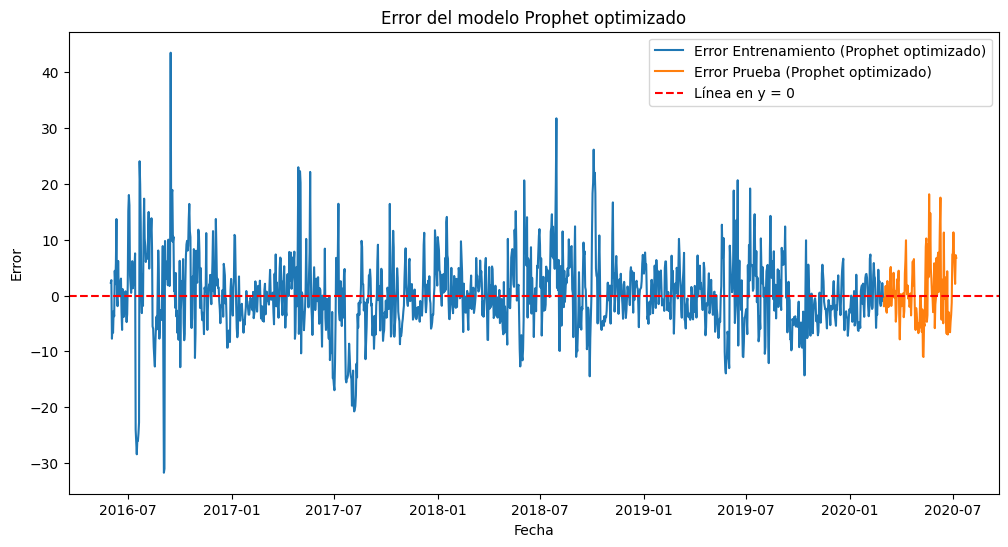

In [56]:
# 5. Graficar el error
error_train_optimized = df_train_prophet_reg['y'] - y_pred_train_optimized
error_test_optimized = df_test_prophet_reg['y'] - y_pred_test_optimized


error_test_optimized_no = error_test_optimized.reset_index(drop=True)
y_pred_test_optimized_no = y_pred_test_optimized.reset_index(drop=True)
df_test_prophet_reg_y_no_index = df_test_prophet_reg['y'].reset_index(drop=True)

error_test_optimized = df_test_prophet_reg_y_no_index - y_pred_test_optimized_no





plt.figure(figsize=(12, 6))
plt.plot(df_train_prophet_reg['ds'], error_train_optimized, label='Error Entrenamiento (Prophet optimizado)')
plt.plot(df_test_prophet_reg['ds'], error_test_optimized, label='Error Prueba (Prophet optimizado)')
plt.axhline(0, color='red', linestyle='--', label='Línea en y = 0')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.title('Error del modelo Prophet optimizado')
plt.legend()
plt.show()

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [ ]:
df = pd.read_csv('cervezas.csv')
df.head()

In [ ]:
df.isna().sum()

No hay valores nulos

Cantidad de cervezas distintas:

In [ ]:
df['beerName'].nunique()

Canitad de `beerStyle` distintos:

In [ ]:
df['beerStyle'].nunique()

Cantidad de usuarios:

In [ ]:
df['userId'].nunique()

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

### Gráficos

Cantidad de usuarios:

In [ ]:
df['userId'].nunique()

Cantidad de productos:

In [ ]:
df['beerName'].nunique()

Cantidad de calificaciones total:

In [ ]:
df['rating'].shape[0]

Calificaciones encontradas en el dataset:

In [ ]:
df['rating'].value_counts()

In [ ]:
fig = px.histogram(df, x='rating', nbins=10, title='Distribución de calificaciones')

fig.show()

Calificaciones faltantes:

In [ ]:
df['rating'].isna().sum()

Calificación promedio:

In [ ]:
df['rating'].mean()

Calificación promedio por producto:

In [ ]:
products_means = df.groupby('beerName')['rating'].mean()
products_means

In [ ]:
fig = px.histogram(products_means, nbins=10, title='Distribución de calificaciones promedios por producto')

fig.show()

### Transformación a matriz

In [ ]:
user_product_matrix = df.pivot_table(index='userId', columns='beerId', values='rating')

user_product_matrix.head()


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [ ]:
#CODIGO AQUI
beer_features = df[['beerId', 'beerName', 'beerStyle']].drop_duplicates()
beer_features.head()


In [ ]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=10)

X = vectorizer.fit_transform(beer_features['beerStyle'])

bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

bow_df.head()


In [ ]:
cosine_similarities = cosine_similarity(bow_df)

def find_similar_beers(beer_name, beer_features, top_n=5):
    idx = beer_features[beer_features['beerName'] == beer_name].index[0]

    similar_indices = cosine_similarities[idx].argsort()[::-1][1:top_n+1]

    # Obtener los nombres de las cervezas más similares
    similar_beers = beer_features.iloc[similar_indices]['beerName']

    print(f"Top 5 cervezas similares a {beer_name}:")
    print(similar_beers)

# Ejecutar la función para 'Chocolate Porter'
find_similar_beers('Chocolate Porter', beer_features)


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [ ]:
#CODIGO AQUI
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))

df_surprise = df[['userId', 'beerId', 'rating']].copy()

dataset = Dataset.load_from_df(df_surprise, reader)

SEED = 42

trainset, testset = train_test_split(dataset, test_size=0.3, random_state=SEED)

In [ ]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}

user_based_knn = KNNBasic(sim_options=sim_options)

user_based_knn.fit(trainset)

user_based_knn_predictions = user_based_knn.test(testset)

In [ ]:
user_based_knn_mae = accuracy.mae(user_based_knn_predictions)

user_based_knn_predictions_df = pd.DataFrame(user_based_knn_predictions)

user_based_knn_predictions_df.head()

In [ ]:
sim_options_item = {
    'name': 'cosine',
    'user_based': False
}

prod_based_knn = KNNBasic(sim_options=sim_options_item)

prod_based_knn.fit(trainset)

prod_based_predictions = prod_based_knn.test(testset)


prod_based_knn_mae = accuracy.mae(prod_based_predictions)
prod_based_knn_mae

In [ ]:
prod_based_knn_predictions_df = pd.DataFrame(prod_based_predictions, columns=['userId', 'beerId', 'rating_true', 'rating_pred', 'details'])

prod_based_knn_predictions_df.head()

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
nmf_model = NMF(random_state=SEED)

nmf_model.fit(trainset)

nmf_predictions = nmf_model.test(testset)
nmf_mae = accuracy.mae(nmf_predictions)
nmf_mae


In [ ]:
nmf_predictions_df = pd.DataFrame(nmf_predictions, columns=['userId', 'beerId', 'rating_true', 'rating_pred', 'details'])

nmf_predictions_df.head()

In [ ]:
svd_model = SVD(random_state=SEED)

svd_model.fit(trainset)

svd_predictions = svd_model.test(testset)
svd_mae = accuracy.mae(svd_predictions)

In [ ]:
svd_predictions_df = pd.DataFrame(svd_predictions, columns=['userId', 'beerId', 'rating_true', 'rating_pred', 'details'])

svd_predictions_df.head()

En este caso el mejor modelos es SVD puesto que presenta un menor Mean Absolute Error (MAE), lo que indica que sus predicciones son cercanas a los datos observados en el conjunto de test

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]

In [ ]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [ ]:
#CODIGO AQUI

def get_top_n(n:int):
    predictions = svd_predictions_df
    predictions = predictions.drop_duplicates(subset=['userId', 'beerId', 'rating_pred'])
    top_n = predictions.groupby('userId').head(n)
    top_n = top_n[['userId', 'beerId', 'rating_pred']].sort_values(['userId', 'rating_pred'], ascending=[True, False])
    return top_n.reset_index(drop=True)

top_3 = get_top_n(3)
top_3.loc[top_3['userId'] == 100]

In [ ]:
homero_rated_beers = df[df['userId'] == 100]['beerId'].unique()
all_beer_ids = df['beerId'].unique()
homero_unrated_beers = np.setdiff1d(all_beer_ids, homero_rated_beers)
random_beers = np.random.choice(homero_unrated_beers, 5, replace=False)

predictions = []
for beer_id in random_beers:
    predicted_rating = svd_model.predict(uid=100, iid=beer_id).est
    predictions.append({'userId': 100, 'beerId': beer_id, 'predicted_rating': predicted_rating})

predictions_df = pd.DataFrame(predictions).sort_values('predicted_rating', ascending=False)
predictions_df

In [ ]:
precisions, recalls = precision_recall_at_k(svd_predictions, k=10, threshold=3.5)
print(f'Precision@10:')
print(f'Mean: {np.mean(list(precisions.values()))}')
print(f'Recall@10:')
print(f'Mean: {np.mean(list(recalls.values()))}')


El sistema es en parte bueno puesto que alrededor del 75% del top 10 recomendaciones que realiza son interesantes para el usuario, pero presenta el problema de un bajo recall, que indica que muhas cervezas interesantes para el usuario no están siendo recomendadas.

In [ ]:
k_values = range(3, 26)
precision_list = []
recall_list = []

for k in k_values:
    precisions, recalls = precision_recall_at_k(svd_predictions, k=k, threshold=3.5)
    precision_list.append(np.mean(list(precisions.values())))
    recall_list.append(np.mean(list(recalls.values())))

df_k = pd.DataFrame({
    'k': k_values,
    'Precision': precision_list,
    'Recall': recall_list
})

fig_k = px.line(df_k, x='k', y=['Precision', 'Recall'],
                 title='Precision and Recall vs k',
                 labels={'value': 'Metric', 'k': 'Top k'},
                 markers=True)

fig_k.show()

La precision se mantiene casi constante, lo que indica que hay un amplio rango de recomendaciones de calidad para entregar a los usuarios.

El aumento de recall con el k se explica por el aumento de la cantidad de recomendaciones consideradas, teniendo más espacio para incluir cervezas relevantes entre las recomendadas.

In [ ]:
fig_k = px.line(df_k, x='k', y=['Precision'],
                 title='Precision vs top k',
                 labels={'value': 'Precision', 'k': 'Top k'},
                 markers=True)

fig_k.show()

Viendo en detalle, la precision disminuye parcialmente a medida que aumenta la cantidad de recomendaciones entregadas, sin embargo, la calidad decae lentamente.

In [ ]:
threshold_values = np.arange(3.0, 4.6, 0.1)
precision_threshold_list = []
recall_threshold_list = []

for threshold in threshold_values:
    precisions, recalls = precision_recall_at_k(svd_predictions, k=10, threshold=threshold)
    precision_threshold_list.append(np.mean(list(precisions.values())))
    recall_threshold_list.append(np.mean(list(recalls.values())))

df_threshold = pd.DataFrame({
    'Threshold': threshold_values,
    'Precision': precision_threshold_list,
    'Recall': recall_threshold_list
})

fig_threshold = px.line(df_threshold, x='Threshold', y=['Precision', 'Recall'],
                         title='Precision and recall vs Threshold',
                         labels={'value': 'Metric', 'Threshold': 'Threshold'},
                         markers=True)

fig_threshold.show()

Precision y recall decaen puesto que se aumenta la exigencia para que una recomendación se considere buena (relevante). Recall decae más lentamente que la precision, esto se puede deber a que, a medida que cada vez hay menos recomendaciones "de calidad", la precision se ve más desfavorecida porque de todas las recomendaciones entregadas pocas son de calidad, mientras que para el recall, si bien también es penalizado, el efecto puede ser menor en tanto esas pocas recomendaciones "buenas" son efectivamente entregadas.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
